# Brain Tumor Classification using Convolutional Neural Network (CNN)

#### The purpose of this project is to develop a model to classify medical MRI images so as to detect whether the images have brain tumor or are healthy

## DATASET:
The dataset used for this project can be downloaded from https://www.dropbox.com/s/jztol5j7hvm2w96/brain_tumor%20data%20set.zip

The dataset was grouped into two classes. The first class is a folder containing images of brain MRI scans that have BRAIN TUMOR and the second folder contains MRI images of Healthy brain scans that do not have brain tumors


### Machine Learning Model Output is Classification Model


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
import imutils
import cv2

In [3]:
#count the number of images in the respective class
ROOT_DIR = "/Users/damilolaaiyetigbo/Downloads/Test/Brain Tumor Data Set"

num_images = {}

for dir in os.listdir(ROOT_DIR):
    num_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
    
print(num_images)

{'Healthey': 2087, 'Brain Tumor': 2513}


In [4]:
#split dataset into training, validation and test data

#we create a training folder
if not os.path.exists("./train"):
    os.mkdir("./train")
    
    for dir in os.listdir(ROOT_DIR):
        os.makedirs("./train/"+dir)
        for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                   size = (math.floor(70/100*num_images[dir])-5), replace=False):
            O = os.path.join(ROOT_DIR, dir, img)
            D = os.path.join('./train',dir)
            shutil.copy(O,D)
            os.remove(O)
else:
    print("Train Folder exists")
    

    
#we create a validation folder
if not os.path.exists("./validation"):
    os.mkdir("./validation")
    
    for dir in os.listdir(ROOT_DIR):
        os.makedirs("./validation/"+dir)
        for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),
                                   size = (math.floor(15/100*num_images[dir])-5), replace=False):
            O = os.path.join(ROOT_DIR, dir ,img)
            D = os.path.join("./validation",dir)
            shutil.copy(O,D)
            os.remove(O)
            
else:
    print("Validation Folder exists")
    
    
#we create a test folder
if not os.path.exists("./test"):
    os.mkdir("./test")
    
    for dir in os.listdir(ROOT_DIR):
        os.makedirs("./test/"+dir)
        for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),
                                   size = (math.floor(15/100*num_images[dir])-5), replace=False):
            O = os.path.join(ROOT_DIR,dir,img)
            D = os.path.join("./test",dir)
            shutil.copy(O,D)
            os.remove(O)
            
else:
    print("Test Folder exists")

In [5]:
import keras
from keras.layers import Dense 
from keras.layers import Conv2D 
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Model
Convolutional Neural Network model was used for this classification and this is because the input data are images and CNN is powerful when it it comes to image classification because it performs image filters at each layer because it is passed to the densed layer. This feature of CNN makes it possible for the model to achieve high accuracy

## Gradient Descent
Adam optimizer was used for the gradient descent and the learning rate used was 0.003. This default learning rate of the compile function was oscilating so the model training did not converge, that was why I had to change to smaller learning rate of 0.003

## Dropout
To prevent the model from overfitting, a dropout of 0.25 was used

## Activation Function
RELU activation function was used at each layer of the network. Since the model is a binary classifier of  0 or 1 i.e BRAIN TUMOR or HEALTHY, sigmoid activation function was used at the output layer

In [6]:
#Construct CNN with 4 convolutional layers and 3 Max poolinglayer
model = Sequential()

model.add(Conv2D(filters=16, kernel_size = (3,3), activation = 'relu', input_shape=(224,224,3)))
model.add(Conv2D(filters=32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation = 'sigmoid'))

#Used Adam as the optimizer and a learning rate of 0.003
optimizer = keras.optimizers.Adam(lr=0.003)
model.compile(loss = keras.losses.binary_crossentropy, optimizer=optimizer, metrics=['accuracy'])

#model.summary()

## Image Processing
ImageDataGenerator was used for image processing to normalize the image data and also to load the dataset in batch size of 32. This was used for the training, validation and test dataset

In [7]:
#Generate batches of tensor image data with real-time data augmentation for training dataset
train_datagen = image.ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2,
                                        rescale = 1./255, horizontal_flip = True)

train_data = train_datagen.flow_from_directory(directory = "./train", target_size=(224,224), 
                                               batch_size=32, class_mode = 'binary')

#prints output classes
train_data.class_indices

Found 3209 images belonging to 2 classes.


{'Brain Tumor': 0, 'Healthey': 1}

In [8]:
#Generate batches of tensor image data with real-time data augmentation for validation dataset
val_datagen = image.ImageDataGenerator(rescale = 1./255)

val_data = train_datagen.flow_from_directory(directory = "./validation", target_size=(224,224), 
                                               batch_size=32, class_mode = 'binary')

#prints output classes
val_data.class_indices

Found 679 images belonging to 2 classes.


{'Brain Tumor': 0, 'Healthey': 1}

In [9]:
#Generate batches of tensor image data with real-time data augmentation for test dataset
test_datagen = image.ImageDataGenerator(rescale = 1./255)

test_data = train_datagen.flow_from_directory(directory = "./test", target_size=(224,224), 
                                               batch_size=32, class_mode = 'binary')

#prints output classes
test_data.class_indices

Found 679 images belonging to 2 classes.


{'Brain Tumor': 0, 'Healthey': 1}

In [10]:
#early stopping
#es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 5, verbose = 1, mode = 'auto')

#model check point to save the best model
mc = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')


In [11]:
#training loop
model = model.fit(train_data,
                 #steps_per_epoch = 8,
                 epochs = 20,
                 #verbose = 1,
                 validation_data = val_data,
                 #validation_steps = 16,
                 callbacks = [mc])

Epoch 1/20
101/101 [==============================] - ETA: 0s - loss: 0.6872 - accuracy: 0.5924
Epoch 00001: val_accuracy improved from -inf to 0.66421, saving model to best_model.h5
101/101 [==============================] - 121s 1s/step - loss: 0.6872 - accuracy: 0.5924 - val_loss: 0.6323 - val_accuracy: 0.6642
Epoch 2/20
101/101 [==============================] - ETA: 0s - loss: 0.5893 - accuracy: 0.6983
Epoch 00002: val_accuracy improved from 0.66421 to 0.73343, saving model to best_model.h5
101/101 [==============================] - 118s 1s/step - loss: 0.5893 - accuracy: 0.6983 - val_loss: 0.5448 - val_accuracy: 0.7334
Epoch 3/20
101/101 [==============================] - ETA: 0s - loss: 0.5624 - accuracy: 0.7202
Epoch 00003: val_accuracy improved from 0.73343 to 0.76141, saving model to best_model.h5
101/101 [==============================] - 114s 1s/step - loss: 0.5624 - accuracy: 0.7202 - val_loss: 0.5078 - val_accuracy: 0.7614
Epoch 4/20
101/101 [=============================

## Model Performance
Model performance was evaluated using ACCURACY.
From the training and validation steps the model achieved 88% training accuracy and 89% validation accuracy (see plots below)


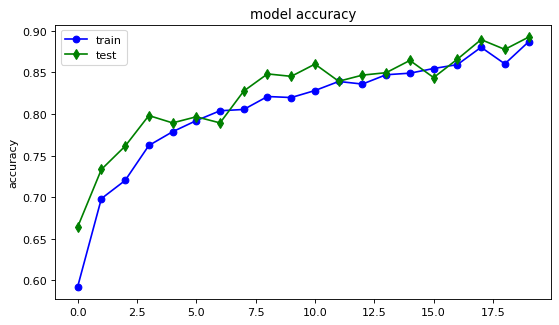

In [12]:
#Visualize the training/testing accuracy:
fig = plt.figure(figsize=(8, 10), dpi=80)
plt.subplot(2,1,1)
plt.plot(model.history['accuracy'],"b-o")
plt.plot(model.history['val_accuracy'],"g-d")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])


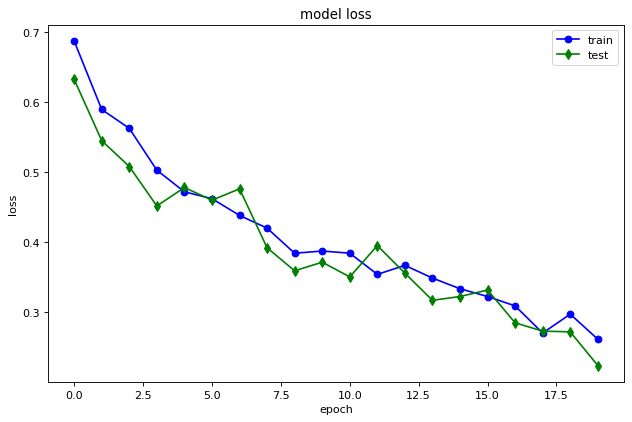

In [13]:
#Visualize the training/validation loss:
fig = plt.figure(figsize=(8, 10), dpi=80)
plt.subplot(2,1,2)
plt.plot(model.history['loss'],"b-o")
plt.plot(model.history['val_loss'],"g-d")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.tight_layout()

In [14]:
#load best fit saved model
from keras.models import load_model

saved_model = load_model("./best_model.h5")

## Test data accuracy
When the model was used to the test data which it had not seen during the training process, the model was able to achieve a high accuracy of 89.84% and loss of 0.226. However, I believe the model can achieve a higher accuracy if it trained for longer number epochs.

In [15]:
#checking accuracy of the model with test data
test_loss, test_accuracy = saved_model.evaluate(test_data)

print("Model Accuracy = {:.2f}% loss = {:.4f}".format(test_accuracy*100,test_loss))

22/22 [==============================] - 8s 373ms/step - loss: 0.2260 - accuracy: 0.8984
Model Accuracy = 89.84% loss = 0.2260


## Prediction
I performed prediction with a sample image which was has not been used during training of testing. The origginal image used does not have brain tumor and the model was able to make accurate prediction, showing that the image is healthy and has no tumor

In [ ]:
#use sample test image to make prediction
path = "./Brain Tumor Data Set/Healthey/Not Cancer  (209).jpg"
img = image.load_img(path, target_size=(224,224), )
img = image.img_to_array(img)/255
test_img=np.array([img])

#pred=model.predict_classes(input_arr)
pred=(saved_model.predict(input_arr) > 0.5).astype("int32")

if pred == 0:
    print("The MRI image has Brain Tumor")
else:
    print("The MRI image is Healthy (It has no brain tumor)")

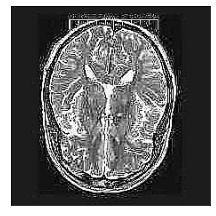

In [145]:
plt.figure(figsize=(30,30))
plt.subplot(7,7,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img)
plt.show()

In [147]:
test_img.shape

(1, 224, 224, 3)